# Gender Relations in FabLabs 

(CC BY 4.0) https://creativecommons.org/licenses/by/4.0/

### Import Libraries 

In [2]:
# Import the `pandas` library as `pd`
import pandas as pd
import numpy as np
import datetime as dt
from datetime import tzinfo, timedelta, datetime, timezone
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import scipy

In [4]:
def calculate_age (born):
    today = dt.date(2017,3,31) 
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [5]:
def calculate_membership (m_start, m_end):
    mstart = pd.to_datetime(m_start, dayfirst=True)
    mend = pd.to_datetime(m_end, dayfirst=True)
    if mend.isnull().values.any():
        mend = dt.date(2017,3,31)
    return mend - mstart

In [6]:
url="/Users/me/Documents/01_Py/AnacondaProjects/GenderMaker/machinelogs/user.csv"

In [7]:
users = pd.read_csv(url, sep=";", encoding = 'iso-8859-1')

In [14]:
counts = users.groupby('usr_gender').size(); counts

usr_gender
\N      19
f      801
m     2486
dtype: int64

In [8]:
users2 = users.replace('\\N', np.nan)

In [14]:
i=0
one_year = np.timedelta64 (1, 'Y')
for birth in users2.usr_dateofbirth:
    users2.loc[[i],"usr_age"] = calculate_age(pd.to_datetime(birth))
    users2.loc[[i],"usr_duration"] = calculate_membership (users2.loc[[i],"mp_from"], users2.loc[[i],"mp_until"])
    users2.loc[[i],"m_duration"] = round (users2.loc[[i],"usr_duration"] / one_year, 1)
    i=i+1
# 'm_duration' is membership duration in years 

In [18]:
male = users2.query('usr_gender == "m"')
male_age = users2.query('usr_gender == "m" & usr_age > 0')
female = users2.query('usr_gender == "f"') 
female_age = users2.query('usr_gender == "f" & usr_age > 0')


In [21]:
counts = users2.groupby('m_duration').size()

In [23]:
count_m = male_age.groupby('usr_age').size()
count_f = female_age.groupby('usr_age').size()

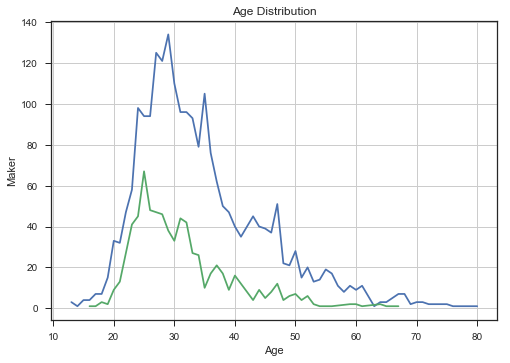

In [24]:
plt.plot(count_m)
plt.plot(count_f)
plt.xlabel('Age')
plt.ylabel('Maker')
plt.title('Age Distribution')
plt.grid(True)
plt.show()

In [26]:
count_md = male.groupby('m_duration').size()
count_fd = female.groupby('m_duration').size()

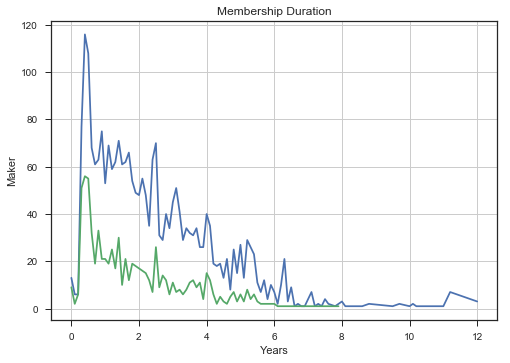

In [27]:
plt.plot(count_md)
plt.plot(count_fd)
plt.xlabel('Years')
plt.ylabel('Maker')
plt.title('Membership Duration')
plt.grid(True)
plt.show()

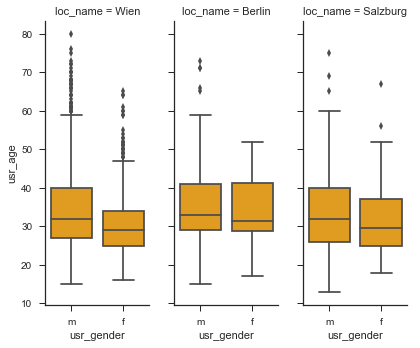

In [28]:
g=sns.FacetGrid(users2, col="loc_name", size=5, aspect=0.4)
g=g.map(sns.boxplot, "usr_gender", "usr_age", color="orange")
plt.show()

In [148]:
twosample_results = scipy.stats.ttest_ind(count_m, count_f)
     
print ('Test Stats:', twosample_results[0])
print ('p-value', twosample_results[1])


Test Stats: 3.33059306828
p-value 0.00118343360346


In [151]:
shapiro_results = scipy.stats.shapiro(male_age.usr_age)
print ('Shapiro Test (m):', shapiro_results[0])
print ('p-value', shapiro_results[1])

shapiro_results = scipy.stats.shapiro(female_age.usr_age)
print ('Shapiro Test (f):', shapiro_results[0])
print ('p-value', shapiro_results[1])

Shapiro Test (m): 0.9290170669555664
p-value 1.2817905433852243e-31
Shapiro Test (f): 0.8996924757957458
p-value 1.0076622941447918e-21


In [152]:
scipy.stats.mannwhitneyu(count_m,count_f)

MannwhitneyuResult(statistic=1050.5, pvalue=0.0033976837342705921)

In [157]:
print('Female Percentiles:', np.percentile (female_age.usr_age,[25,50,75]))
print('Female Percentiles:', np.percentile (male_age.usr_age,[25,50,75]))
#np.percentile (male.usr_age, 25)

Female Percentiles: [ 25.  29.  35.]
Male Percentiles: [ 27.  32.  40.]
